# Generate Charts

THis was created by installing the development version of incense git+https://github.com/JarnoRFB/incense.git at 4236128faae866b6bb7a5a32f0914812895b024e

In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


In [7]:
RESULTS_DIR = Path('../results')

In [8]:
def read_pkl(fname): return pd.read_pickle(RESULTS_DIR/fname).rename(columns={"review_contents": "review contents", "pos_tags": "POS tags L0", "path_pos_bigrams": "POS paths L1", "nested_pos_bigrams" : 'POS nested pairs'})
def plot(fname, title="Title", xlabel="xlabel", ylabel="ylabel"):
    graph = read_pkl(fname).plot(title=title)
    graph.set_xlabel(xlabel)
    graph.set_ylabel(ylabel)
    return graph


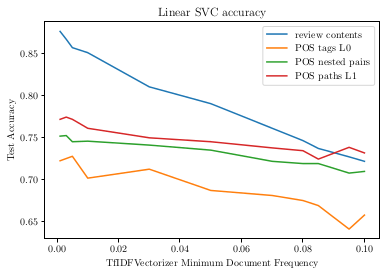

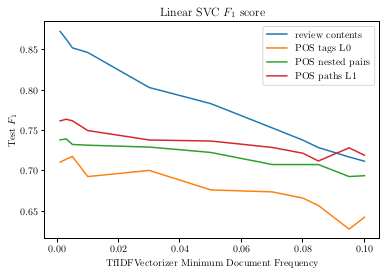

In [12]:
plot('svc_df_acc.pkl', title="Linear SVC accuracy", xlabel="TfIDFVectorizer Minimum Document Frequency", ylabel="Test Accuracy")

plot('svc_df_f1.pkl', title="Linear SVC $F_1$ score", xlabel="TfIDFVectorizer Minimum Document Frequency", ylabel="Test $F_1$")

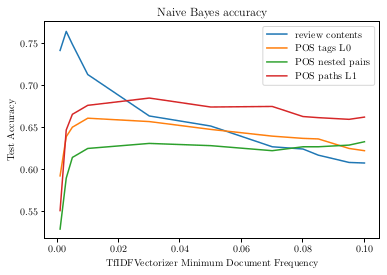

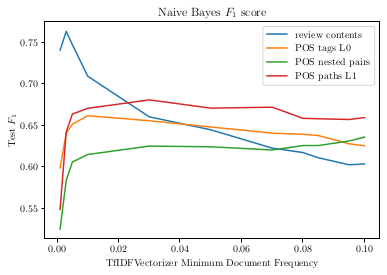

In [13]:
plot('nb_df_acc.pkl', title="Naive Bayes accuracy", xlabel="TfIDFVectorizer Minimum Document Frequency", ylabel="Test Accuracy")
plot('nb_df_f1.pkl', title="Naive Bayes $F_1$ score", xlabel="TfIDFVectorizer Minimum Document Frequency", ylabel="Test $F_1$")